## The Data

**Please Note: This dataset was a part of my Python for Data Science and Machine Learning Bootcamp. I have created this notebook to solve the problem that was asked below and to create a model**

I will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Loading data and imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
#Create a function to read the description from the info .csv
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

c:\users\anant\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

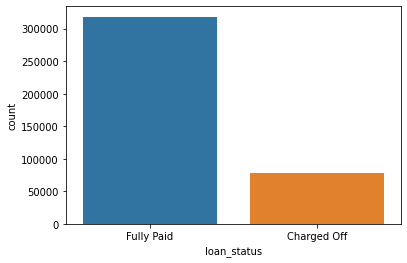

In [7]:
sns.countplot(df['loan_status'])

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

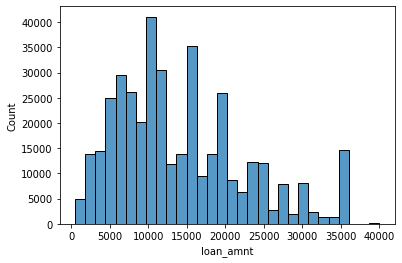

In [8]:
sns.histplot(df['loan_amnt'], bins =30)

**Calculating correlation between contionus features to see any potential relationships between variables**

In [9]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

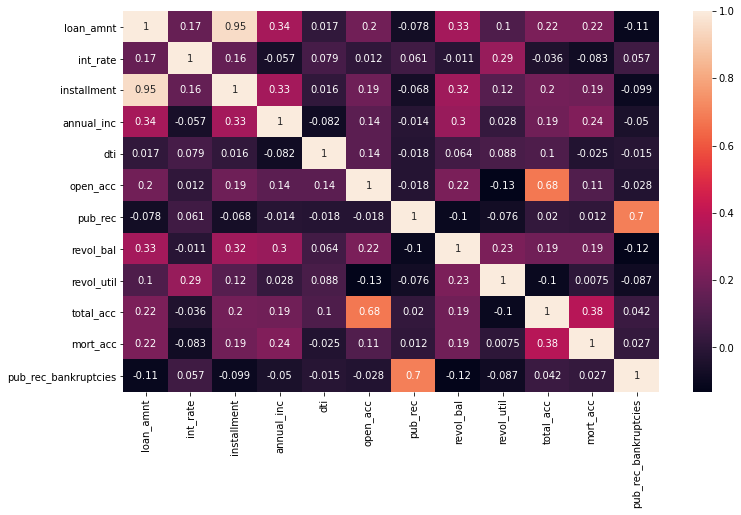

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot = True )

**There is a high correlation between installment and loan_amnt. Lets check to see if that makes any sense**

In [11]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [12]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

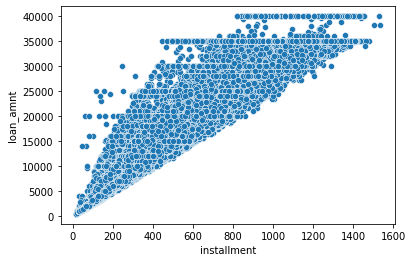

In [13]:
sns.scatterplot(data=df, x='installment',y='loan_amnt')

**The relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

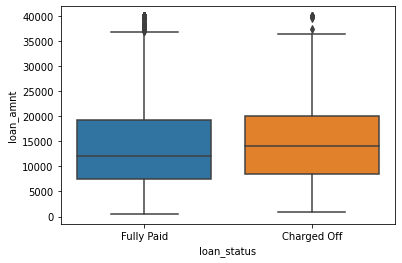

In [14]:
sns.boxplot(data =df,x='loan_status', y='loan_amnt')

**Summary statistics for the loan amount, grouped by the loan_status.**

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Grade and SubGrade**

In [16]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
sort = df['sub_grade'].sort_values().unique()
sort

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

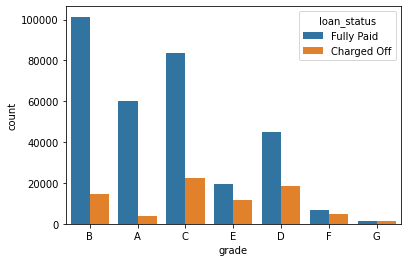

In [18]:
sns.countplot(data=df,x='grade',hue='loan_status')

**Count plot per subgrade**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

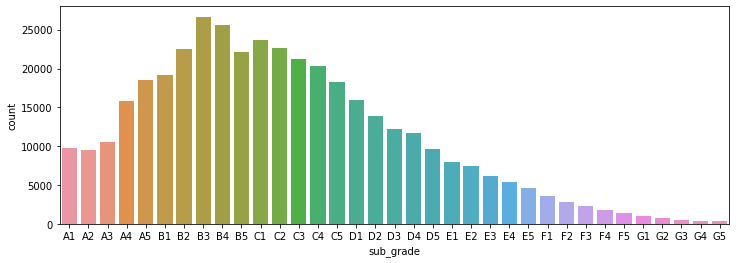

In [19]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x='sub_grade', order=sort)

**Count plot per subgrade**  
###### loan status as hue

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

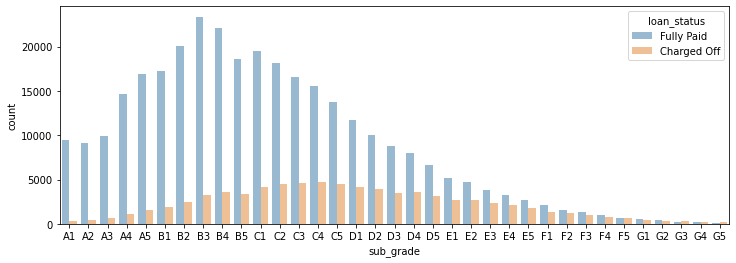

In [20]:
plt.figure(figsize = (12,4))
sns.countplot(data=df, x='sub_grade', order=sort, hue = 'loan_status', alpha = .5)

**F and G subgrades don't get paid back that often. Lets look at that some more.**

In [21]:
FandG = df[(df['grade']=='G') | (df['grade']=='F')]

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

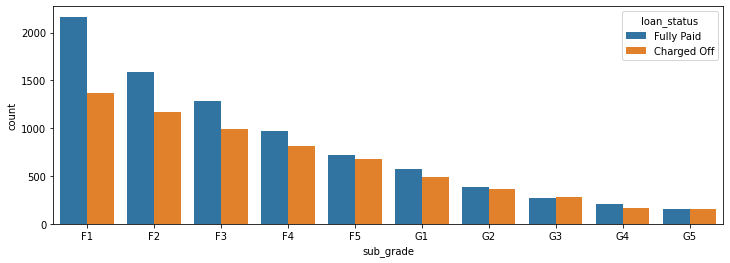

In [22]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(FandG['sub_grade'].unique())
sns.countplot(x='sub_grade',data=FandG,order = subgrade_order,hue='loan_status')

**Lets turn our label/y feature (loan_status) into a binary classification**

In [23]:
df['loan_repaid'] = [1 if df.iloc[x]['loan_status'] == 'Fully Paid' else 0 for x in range(0,len(df))]

In [24]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Lets look at the how our loan_repaid column correlates with other numeric features**

In [25]:
df.corrwith(df['loan_repaid'])[:-1].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
dtype: float64

<AxesSubplot:>

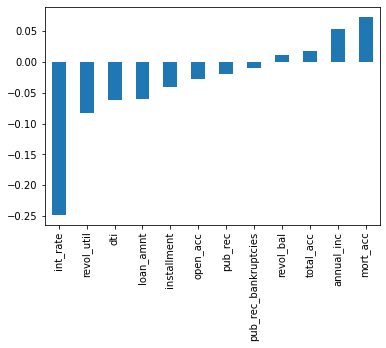

In [26]:
df.corrwith(df['loan_repaid'])[:-1].sort_values().plot.bar(sort_columns = True)

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [28]:
len(df)

396030

**Lets look at the total count of missing values per column.**

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**This is in term of percentage of the total DataFrame**

In [30]:
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**The nulls that are left are emp_title, emp_length, title, mort_acc, and pub_rec_bankruptcies. Lets take a look at all of them.**

**Let's examine emp_title and emp_length**

In [31]:
print(feat_info('emp_title'))
print("\n")
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**How many unique employment job titles are there**

In [32]:
df['emp_title'].nunique()

173105

In [33]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Dennis Alleman DMD                         1
Truck drive                                1
Plourde, Bogue, Moylan + Marino            1
Logisitics                                 1
Manager of Remote Statement Services       1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [34]:
df = df.drop('emp_title',axis = 1)

**Now emp_length**

In [35]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [36]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

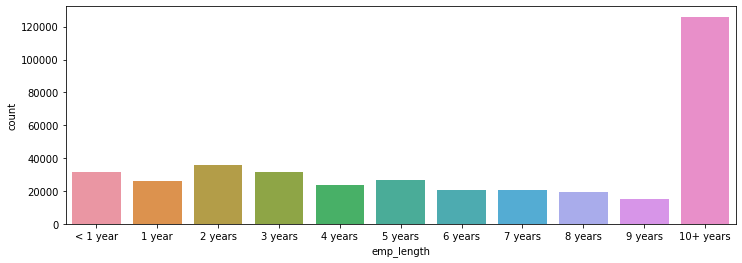

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

**Lets see the countplot with respect to our classification**

<AxesSubplot:xlabel='emp_length', ylabel='count'>

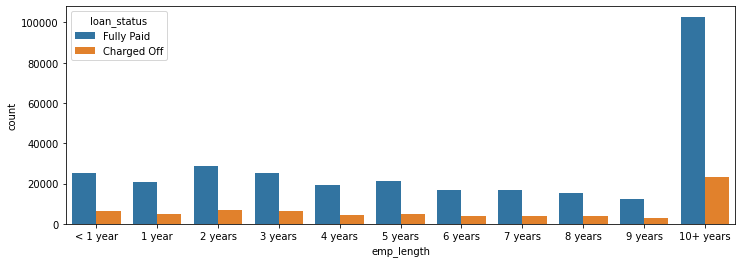

In [38]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

**Doesnt help yet lets look at the charge off per category to see if that makes a difference**

In [39]:
a = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [40]:
b = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [41]:
c = a/b

In [42]:
c

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

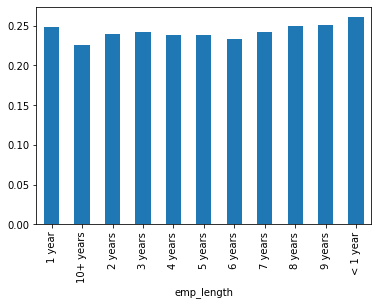

In [43]:
c.plot.bar()

**Charge off rates are extremely similar across all employment lengths. This would have very low if any affect on our model. No need to keep and manage the null values. Lets drop the column.**

In [44]:
df = df.drop('emp_length',axis =1)

**By tranposing, we can see all collumns a little bit clearer**

In [45]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Verified,Source Verified,Not Verified,Verified,Verified,...,Not Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Source Verified,Verified,Verified,Verified
issue_d,Jan-2015,Jan-2015,Jan-2015,Nov-2014,Apr-2013,Sep-2015,Sep-2015,Sep-2012,Oct-2014,Apr-2012,...,Dec-2015,Feb-2011,Oct-2015,Apr-2014,Mar-2013,Oct-2015,Feb-2015,Oct-2013,Aug-2012,Jun-2010


**Title column vs the purpose column**

In [46]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [47]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column seems to be a string subcategory/description of the purpose column. Seems better to drop it as well**

In [48]:
df = df.drop('title', axis = 1)

**mort_acc**

In [49]:
feat_info('mort_acc')

Number of mortgage accounts.


In [50]:
df['mort_acc'].nunique()

33

**TASK: Create a value_counts of the mort_acc column.**

In [51]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

**Let's review the other columns to see which most highly correlates to mort_acc**

In [52]:
df.corrwith(df['mort_acc']).sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
dtype: float64

**Total_acc feature correlates with the mort_acc. Let's group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc.**

In [53]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value.**


In [54]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [55]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [56]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [57]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**Not that many entries left but lets see what percentage of the entries still contain missing values**

In [58]:
df.isnull().sum()/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**evol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.2% of the total data. It would be best I believe to remove those rows**

In [59]:
df = df.dropna()

In [60]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**Now its time to deal with the string values due to the categorical columns.**

**Lets take a look at the df with the non-numeric data**

In [61]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [62]:
df[df.select_dtypes(['object']).columns]

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [63]:
for i in df[df.select_dtypes(['object']).columns]:
    print(i)
    print(df[df.select_dtypes(['object']).columns][i].value_counts())
    print('\n')

term
 36 months    301247
 60 months     93972
Name: term, dtype: int64


grade
B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64


sub_grade
B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64


home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64


verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64


issue_d
Oct-2014    14838
Jul-2014    12

**Let's now go through all the string features to see what we should do with them.**  



**verification_status, application_type,initial_list_status,purpose**   
**These can all instantly become dummy variables**

In [64]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

**term**

In [65]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

**We can convert this into numeric variables**

In [66]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [67]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

**grade**

**We already know grade is part of sub_grade so we can drop this grade feature and use the sub_grade feature instead**

In [68]:
df = df.drop('grade', axis =1 )

In [69]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)


In [70]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

**home_ownership**

In [72]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Lets convert to dummy variables but first lets join the bottom three values together as OTHER so we can have only 4 categories**

In [73]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

**address**  
**to help our model and better clarify we can use the zipcode instead of the full address**

In [74]:
df['zipcode'] = df['address'].apply(lambda zip: zip[-5:])

In [75]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

**All hold significance to me so lets create dummy variables and remove the address column**

In [76]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = df.drop(['zipcode','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

**issue_d** 



In [77]:
feat_info('issue_d')

The month which the loan was funded


**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, lets drop this feature.**

In [78]:
df = df.drop('issue_d', axis = 1)

**earliest_cr_line**


In [79]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

**This seems like a timeseries feature in which case lets just use the year**

In [80]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

**loan_status**  
**Because we already created our loan_repaid column, we could now drop the loan_status column as we have our 0 and 1 binary classification already**

In [81]:
df = df.drop('loan_status', axis = 1 )

In [82]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

Now that we have taken care of all non numeric columns we can continue

---
---
# Section 3: Creating the model

**Section Goals: Split, Normalize, and Create a model for our data**

## Train Test Split

In [83]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
#Using random_state 101 in order to compare answers

## Normalizing the Data

**Lets use a MinMaxScaler to normalize the feature data X_train and X_test. To prevent data leakage, we will only fit on the X_train data.**

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

## Creating the Model

**Lets use a Sequential Model**

In [88]:
model = Sequential()

model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.5))
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [89]:
model.fit(X_train,y_train, epochs = 25, validation_data = (X_test,y_test),
         batch_size = 256)
#Will consider spliiting for validation data as well in later revisions
#Also can use early stopping as well

Epoch 1/25
1236/1236 [==============================] - 12s 8ms/step - loss: 0.4216 - val_loss: 0.2698
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2789 - val_loss: 0.2659
Epoch 3/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2703 - val_loss: 0.2645
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2684 - val_loss: 0.2654
Epoch 5/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2647 - val_loss: 0.2643
Epoch 6/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2646 - val_loss: 0.2645
Epoch 7/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2643 - val_loss: 0.2635
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2626 - val_loss: 0.2643
Epoch 9/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2645 - val_loss: 0.2630
Epoch 10/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.26

# Section 3: Evaluating Model Performance.

**Section Goals: Plot out the validation loss versus the training loss.**

<AxesSubplot:>

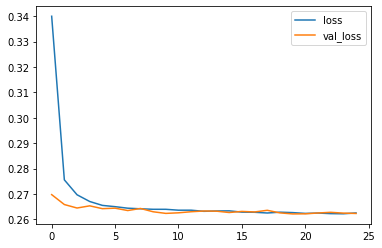

In [90]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

**Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [91]:
predictions = model.predict_classes(X_test)

c:\users\anant\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [92]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 6720  8938]
 [    0 63386]]


**Lets check with a random person**

In [93]:
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [94]:
model.predict_classes(new_customer.values.reshape(1,78))

c:\users\anant\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1]])

**did this person actually end up paying back their loan?**

In [95]:
df.iloc[random_ind]['loan_repaid']

1.0